# Machine Learning /Classification Problem
          By Eng-Janvier NIYITEGEKA
          email: nijas2012@yahoo.com
            Data scientist
          Assistant Lecturer/IPRC TUMBA

A machine learning problem becomes a classification problem when the target or the output variables are discret.

This work aims to explore the Iris dataset and train a machine learning algorithm to classify the flowers based on the measured sepal length&width and petal length&width of the given flowers

Let import the python packages that will help to explore the data and build a machine learning algorithm to generate the the flower type predictive model.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import seaborn as sbn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In this tutorial we are going to use the iris dataset from the sklearn.datasets container. Secondly we are going to use LogisticRegression and KNeighnorsClassifier as a machine learning algorithms to build a predictive model for classifying the given flowers based on the sepal and petal measurement. GradientBoostingClassifier will be used also

model=LogisticRegression()
iris=load_iris()

# EXPLORING DATA

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

let check the shape of the input features

In [5]:
df=iris.data
df.shape

(150, 4)

In [6]:
df[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

the dadaset contains only 150 samples or rows and 4 columns

letcheck the names of the columns

In [7]:
columns=iris.feature_names
print(columns)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The input features are : 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

let check the shape of the target variable

In [8]:
target = iris.target
target.shape,target

((150,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

Let check the name of classes contained in the target variable

In [9]:
print("Target Classes: ",iris.target_names)

Target Classes:  ['setosa' 'versicolor' 'virginica']


There are three classes in the target variable ('setosa' 'versicolor' 'virginica')

Now we are going to build a pandasdataframe of the iris dataset using pandas python package

In [10]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.shape

(150, 4)

Let print first five rows of the pndasdataframe constructed

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let replace the name of the columns in the above table

In [12]:
column=['sepal length','sepal width','petal length','petal width']

In [13]:
df=pd.DataFrame(iris.data,columns=column)

In [14]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let add the target column on the this pandas dataframe

In [15]:
df['target']=iris.target

In [16]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Let add another column that shows the class of each sample in the dataframe

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
d={0:'setosa',1:'versicolor',2:'virginica'}

In [19]:
df['Class']=df['target'].apply(lambda x:d[x])

In [20]:
df.head()

,sepal length,sepal width,petal length,petal width,target,Class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Let analyze the distribution of the classes based on the sepal length and the sepal width

In [21]:
X=df.iloc[:,:2]
Y=df.target

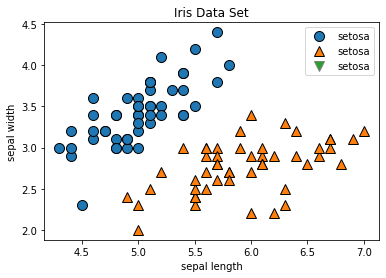

In [22]:
import mglearn
mglearn.discrete_scatter(df['sepal length'][:100],df['sepal width'][:100],Y)
plt.title('Iris Data Set')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(df.Class,loc='best')

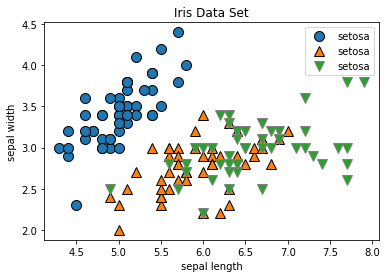

In [23]:
mglearn.discrete_scatter(df['sepal length'][:150],df['sepal width'][:150],Y)
plt.title('Iris Data Set')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(df.Class,loc='best')

If you are getting error because of missing mglearn package, please run first the following code inside the this notebook to install the package. (code: !pip install mglearn)

Let look a the data using seaborn package

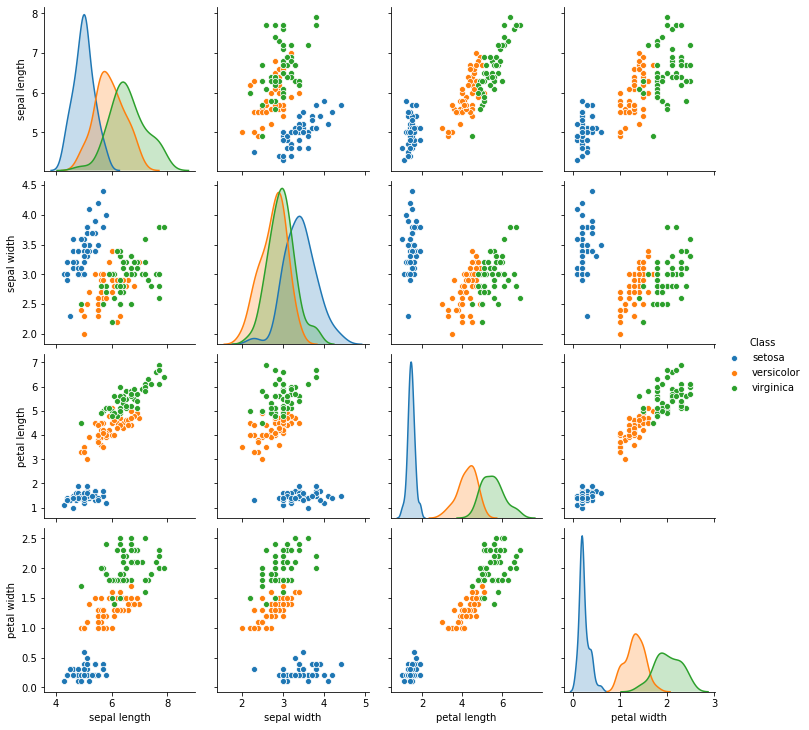

In [24]:
sbn.pairplot(df, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue='Class')

We can visulize the values of sepal width & sepal length from the flowers dataset using a contour plot. The shade of blue represent the density of values in a region of the graph.

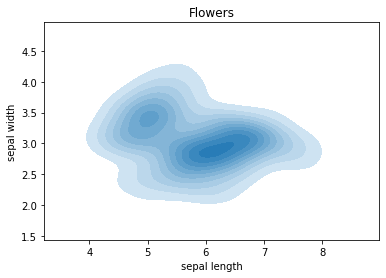

In [26]:
plt.title("Flowers")

sbn.kdeplot(df['sepal length'], df['sepal width'], shade=True, shade_lowest=False);

We can segment speicies of flowers by creating multiple contour plots with different colors.

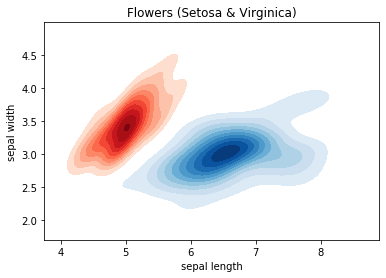

In [28]:
setosa = df[df.Class == 'setosa']
virginica = df[df.Class == 'virginica']

plt.title("Flowers (Setosa & Virginica)")

sbn.kdeplot(setosa['sepal length'], setosa['sepal width'], shade=True, cmap='Reds', shade_lowest=False)
sbn.kdeplot(virginica['sepal length'], virginica['sepal width'], shade=True, cmap='Blues', shade_lowest=False);

Bar Chart

A bar chart presents categorical data with rectangular bars with heights proportional to the values that they represent. If there are multiple values for each category, then a bar plot can also represent the average value, with confidence intervals.

We can use a bar chart visulize the average value of the sepal length for flowers , segmented by flowers categories, for the "iris" dataset

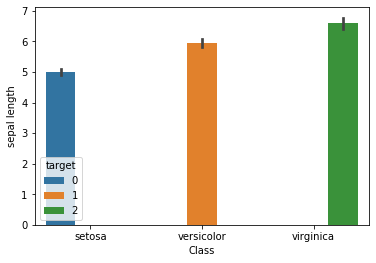

In [29]:
sbn.barplot(x="Class", y="sepal length", hue="target", data=df);

# START MODEL TRAINING

splitting the data into inputs and output

In [63]:
X=df.iloc[:,:4]
Y=df.target
X.shape,Y.shape

((150, 4), (150,))

dividing the dataset into taining and testing dataset 

In [64]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

80 percent and 20 percent of the data are used training and testing respectively.

Let fit the model with training inputs and training output variables

In [65]:
model=model.fit(x_train,y_train)

C:\Users\nijas2012\.conda\envs\janvierAI\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [66]:
print("Training score={:.3f}".format(model.score(x_train,y_train)))
print("Test Score={:.3f}".format(model.score(x_test,y_test)))

Training score=0.975
Test Score=1.000


In [68]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Apply Regularization techniques

In [107]:
model = LogisticRegression(C =0.001,max_iter = 10000)
model

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
model=model.fit(x_train,y_train)

In [109]:
print("Training score={:.3f}".format(model.score(x_train,y_train)))
print("Test Score={:.3f}".format(model.score(x_test,y_test)))

Training score=0.900
Test Score=0.933


Using KNeighborsClassifier

In [110]:
model = KNeighborsClassifier(n_neighbors=13)

In [111]:
model=model.fit(x_train,y_train)

In [112]:
print("Training score={:.3f}".format(model.score(x_train,y_train)))
print("Test Score={:.3f}".format(model.score(x_test,y_test)))

Training score=0.967
Test Score=1.000


In [115]:
pred = model.predict(x_test)
score = model.score(x_test,y_test)
print('Accuracy: {0:0.3f}'.format(accuracy_score(y_test, pred)))

Accuracy: 1.000


Plot feature of importance

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [159]:
model = GradientBoostingClassifier(random_state=42,max_depth=10, n_estimators=200)

In [160]:
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [161]:
model=model.fit(x_train,y_train)

In [162]:
print("Training score={:.3f}".format(model.score(x_train,y_train)))
print("Test Score={:.3f}".format(model.score(x_test,y_test)))

Training score=1.000
Test Score=1.000


In [165]:
n_features=4

(-1, 4)

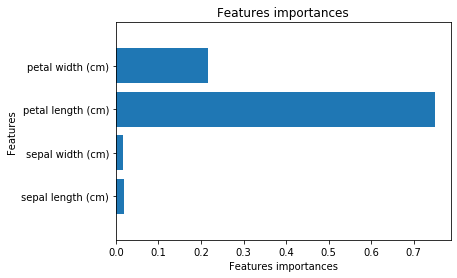

In [166]:
import numpy as np
plt.barh(np.arange(n_features),model.feature_importances_,align='center')
plt.yticks(np.arange(n_features),iris.feature_names)
plt.ylabel('Features')
plt.xlabel('Features importances')
plt.title('Features importances')
plt.ylim(-1,n_features)

It seems like petal length and petal width are more import features for classifying the flowers

In [169]:
X=df.iloc[:,2:4]
Y=df.target

In [170]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [171]:
model=model.fit(x_train,y_train)

In [172]:
print("Training score={:.3f}".format(model.score(x_train,y_train)))
print("Test Score={:.3f}".format(model.score(x_test,y_test)))

Training score=0.992
Test Score=1.000


Good accuracy was achived by selectingonly two features of importance provided by GradientBoostingClassier

Thank you for following this tutorial of machine learning classification problem